In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

## 讀取檔案

In [2]:
df = pd.read_csv('train.csv')
df = df.drop(['Id'], axis=1) # drop col Id and SalePrice

df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

## 取出連續型特徵 (方便降維)

In [3]:
#Get columns which dtype equals float64 or int64 
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
num_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

另一個高深的寫法，只有一行解決

In [4]:
#Get Columns which dtype is not object
conti= [col for col in df.columns if df[col].dtypes != 'object']


In [5]:
df = df[num_features]


## 分析缺失值

missing samples: 257


<function matplotlib.pyplot.show(close=None, block=None)>

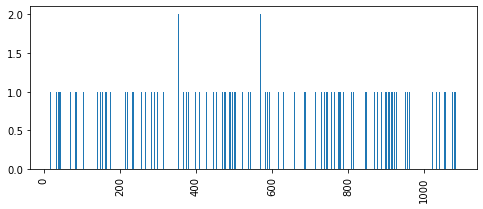

In [6]:
"""練習印出缺失值圖表 """
missing = df.isna().sum(axis=1)
missing = missing[missing > 0]
print(f'missing samples: {len(missing)}')

missing.sort_values(inplace=True)

plt.figure(figsize=(8, 3))
plt.bar(missing.index, missing.values)
plt.xticks(rotation='vertical')
plt.show

## 去除缺失值

In [7]:
""" 去除缺失值 """
print(f'before delete: {df.shape}')
df_nona = df.dropna()
print(f'after delete: {df_nona.shape}')

before delete: (1095, 37)
after delete: (838, 37)


## 轉化成 ndarray 後進行標準化，並將 Y 透過四分位數轉換成四個類別

In [18]:
X=np.array(df_nona)
X = X/(X.max()-X.min())
Y=np.array(df_nona['SalePrice'])
Y=pd.qcut(Y, 4, labels=False)
print(X.shape, Y.shape)

(838, 37) (838,)


## 利用 TSNE 降維

In [19]:
tsne = TSNE(
    n_components=2, init='pca', perplexity = 40, 
    early_exaggeration = 8, learning_rate = 150,
    n_iter = 2000
)
X_tsne = tsne.fit_transform(X)

## 做圖

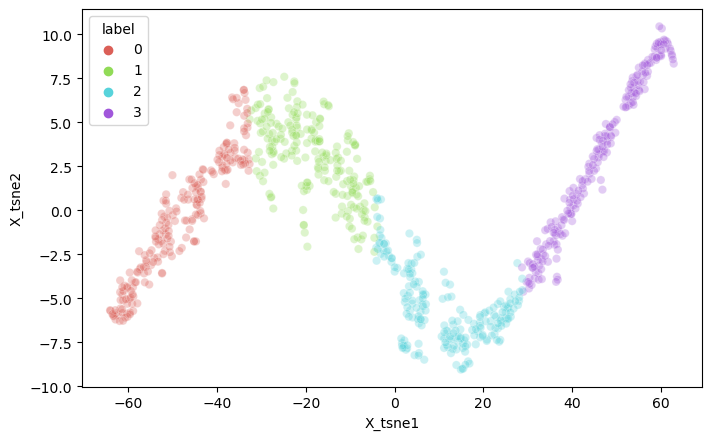

In [20]:

df_tsne = pd.DataFrame()
df_tsne['X_tsne1'] = X_tsne[:, 0]
df_tsne['X_tsne2'] = X_tsne[:, 1]
df_tsne['label'] = Y
plt.figure(figsize = (8, 5), dpi = 100)
sns.scatterplot(
    x = 'X_tsne1', y = 'X_tsne2',
    hue = 'label', palette = sns.color_palette('hls', 4),
    data = df_tsne, legend = 'full',
    alpha = 0.3
)
plt.show()

## 1. 請問同學從降維後的圖表中可以看出什麼現象？

## 2. 請同學分析，什麼因素導致降維後的點座標重合性高？